Lending Club company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.  

Company wants to do analysis to make their business profitable and customer friendly. So Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 
***Problem Statement***:
The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

In [41]:
#Import all the needed libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [42]:
#Load the dataset and check for the top 5 rows
ds = pd.read_csv("loan.csv")

In [43]:
ds.shape

(39717, 111)

In [44]:
#Drop all the columns that contains only NA as values
ds=ds.dropna(axis='columns',how='all')
ds.shape

(39717, 57)

In [45]:
#Check for unique values
ds.nunique(axis=0)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [46]:
#Drop all the coulmns which have only one unique value as they don't give us any info on loan can be defaulted or not
ds=ds.loc[:,ds.apply(pd.Series.nunique) != 1]

In [47]:
ds.nunique(axis=0)

id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  28820
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
url                        39717
desc                       26527
purpose                       14
title                      19615
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
mths_since_last_delinq        95
mths_since_last_record       111
open_acc                      40
pub_rec   

In [48]:
# Drop the columns which will is of only text type
ds.drop("url", axis=1, inplace=True)
ds.drop("desc", axis=1, inplace=True)
ds.drop("title", axis=1, inplace=True)
ds.drop("emp_title", axis=1, inplace=True)
ds.drop("zip_code", axis=1, inplace=True)
ds.drop("addr_state", axis=1, inplace=True)
#Drop the unnceseesary id values
ds.drop("member_id", axis=1, inplace=True)
ds.drop("id", axis=1, inplace=True)

In [49]:
# Remove the fields which is applicable after the loan is approved.These columns cannot decide load defaulted or not.

ds.drop("mths_since_last_delinq", axis=1, inplace=True)
ds.drop("mths_since_last_record", axis=1, inplace=True)
ds.drop("next_pymnt_d", axis=1, inplace=True)
ds.drop("total_acc", axis=1, inplace=True)
ds.drop("total_pymnt", axis=1, inplace=True)
ds.drop("total_pymnt_inv", axis=1, inplace=True)
ds.drop("total_rec_int", axis=1, inplace=True)
ds.drop("total_rec_late_fee", axis=1, inplace=True)
ds.drop("total_rec_prncp", axis=1, inplace=True)
ds.drop("last_pymnt_d", axis=1, inplace=True)
ds.drop("last_credit_pull_d", axis=1, inplace=True)
ds.drop("earliest_cr_line", axis=1, inplace=True)
ds.drop("inq_last_6mths", axis=1, inplace=True)
ds.drop("open_acc", axis=1, inplace=True)
ds.drop("pub_rec", axis=1, inplace=True)
ds.drop("revol_bal", axis=1, inplace=True)
ds.drop("out_prncp", axis=1, inplace=True)
ds.drop("recoveries", axis=1, inplace=True)
ds.drop("collection_recovery_fee", axis=1, inplace=True)
ds.drop("last_pymnt_amnt", axis=1, inplace=True)
ds.drop("revol_util", axis=1, inplace=True)
ds.drop("out_prncp_inv", axis=1, inplace=True)
ds.drop("delinq_2yrs", axis=1, inplace=True)

**Fill the null values for two columns emp_length,pub_rec_bankruptcies with default values**

In [50]:
#Fill emploment length null values as 1000 to indentify that as missing  value for analysis since it is not a practical number and also replace < 1 year with 0.5 for analysis. Convert the employee lenght to numeric for our analysis          
ds.emp_length=ds.emp_length.str.replace("< 1 year", "0.5 year", regex=True)
ds['emp_length'] = ds['emp_length'].fillna('1000 years')
ds.emp_length=(ds.emp_length.str.extract('(\d+)'))
ds.emp_length=ds.emp_length.apply(pd.to_numeric)

In [51]:
ds['emp_length'].value_counts()

10      8879
0       4583
2       4388
3       4095
4       3436
5       3282
1       3240
6       2229
7       1773
8       1479
9       1258
1000    1075
Name: emp_length, dtype: int64

In [52]:
#Replace missing/null values in pub_rec_bankruptcies with string "NOTAVAILABLE"
ds['pub_rec_bankruptcies'] = ds['pub_rec_bankruptcies'].fillna('NOTAVAILABLE')

In [53]:
#Check the values now on pub_rec_bankruptcies
ds['pub_rec_bankruptcies'].value_counts()

0.0             37339
1.0              1674
NOTAVAILABLE      697
2.0                 7
Name: pub_rec_bankruptcies, dtype: int64

In [54]:
#Validate the dataset for null values. Since we have treated all the null values we are done with data 
#Cleaning we can proceed with data analysis
ds.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

In [55]:
# We are intrested only on the loans that are Fully paid and Charged off. 
#For the loads that are current we don't whether they will be defaulted or not So removing them
ds = ds[~(ds.loan_status == "Current")]

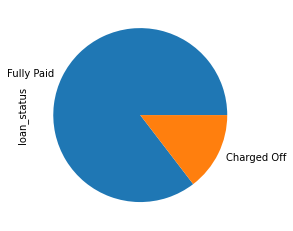

In [56]:
#Confirm the loan status contains only two status
ds['loan_status'].value_counts().plot.pie()
plt.show()

**Handling Outliers**

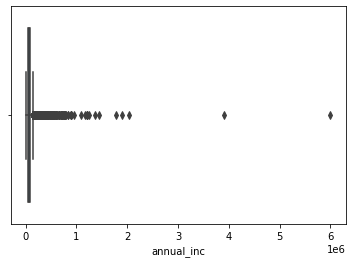

In [57]:
ds.annual_inc.describe()
sns.boxplot(ds['annual_inc'])
plt.show()

In [58]:
#From the above box plot there are clearly outliers present in annual income. Get the percentile values to confirm and to remove  outliers
quantile_info = ds.annual_inc.quantile([0.25, 0.75,0.95])
quantile_info

0.25     40000.0
0.75     82000.0
0.95    140004.0
Name: annual_inc, dtype: float64

In [59]:
#We can see that there is drastic jump in values after 95th quantile. Removing this outliers from annual income
annual_inc_95Percentile = ds['annual_inc'].quantile(0.95)
ds = ds[ds.annual_inc <= annual_inc_95Percentile]

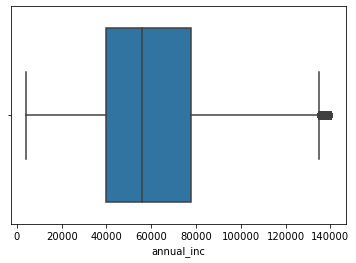

In [60]:
#Validate the boxplot now how the annual income looks like and make sure there are no outliers
sns.boxplot(ds['annual_inc'])
plt.show()

# <a id='1'>1.Uni-Variate Analysis</a>

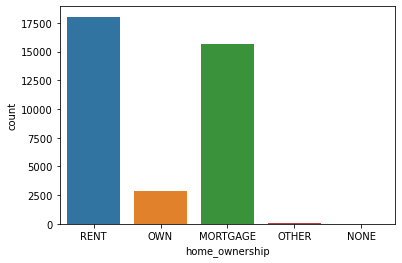

In [61]:
##plot a graph to analyse home_ownership for taking more loans
ds.home_ownership.value_counts()
sns.countplot(x="home_ownership", data=ds)
plt.show()

**Observations**

 People choose loans in order to pay the rent

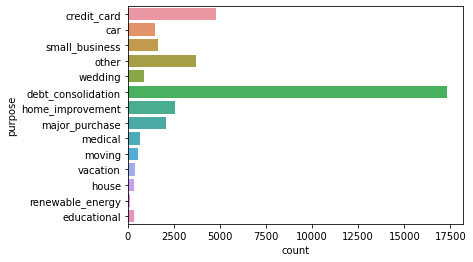

In [62]:
#plot a graph to check purpose for which more loans are requested for
ds.purpose.value_counts()
sns.countplot(y="purpose", data=ds)
plt.show()

**Observations**

The purpose for which loan amount is used is for paying debt consoldiation followed by credit call bill payment


# <a id='2'>2.Segmented UniVariate Analysis</a>

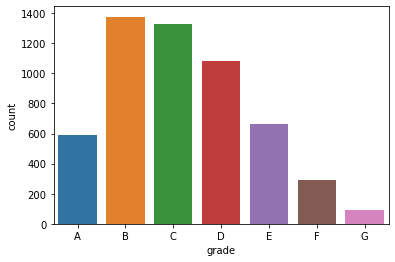

In [63]:
#plot a graph to check grade for which more defaulted loans are present
sns.countplot(x = 'grade', data = ds[ds.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.show()

**Observations**
Grade B has more percentage of defauluting the loan


In [64]:
ds.sub_grade.head

<bound method NDFrame.head of 0        B2
1        C4
2        C5
3        C1
5        A4
         ..
39711    B1
39712    A4
39713    C1
39714    A4
39716    E2
Name: sub_grade, Length: 36654, dtype: object>

In [65]:
#Remove preceeding grade values from Subgrade column for easiler analysis
ds.sub_grade = pd.to_numeric(ds.sub_grade.apply(lambda x : x[-1]))
ds.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

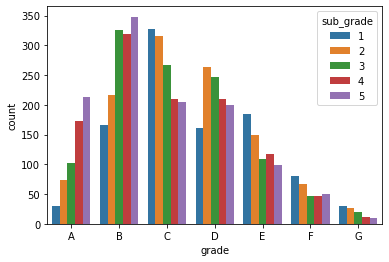

In [66]:
#plot a graph to check grade and subgrade for which more defaulted loans are present
fig, ax = plt.subplots()
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = ds[ds.loan_status == 'Charged Off'])
plt.show()

**Observations**
Grade B has more percentage of defaulting the loan and in the GradeB Subtyppe of B4 is having more defaulted loans

# <a id='2'>3.Bi-Variate Analysis</a>

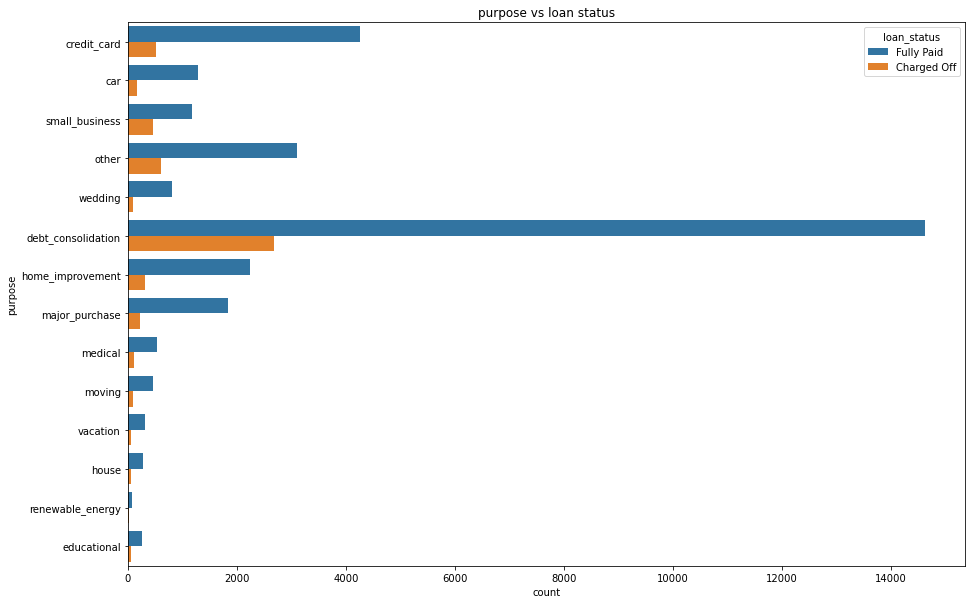

In [67]:
# Analyse the graph to check Loan status vs purpose 
plt.figure(figsize=[15,10])
plt.title("purpose vs loan status")
sns.countplot(y="purpose",hue="loan_status",data=ds)
plt.show()

**observation**

Most charged off loans are avaiable under debt_consolidation and loans taken for renewable_energy has no defaulted loans means customer who took loans for this purpoe most likely to pay loan amount

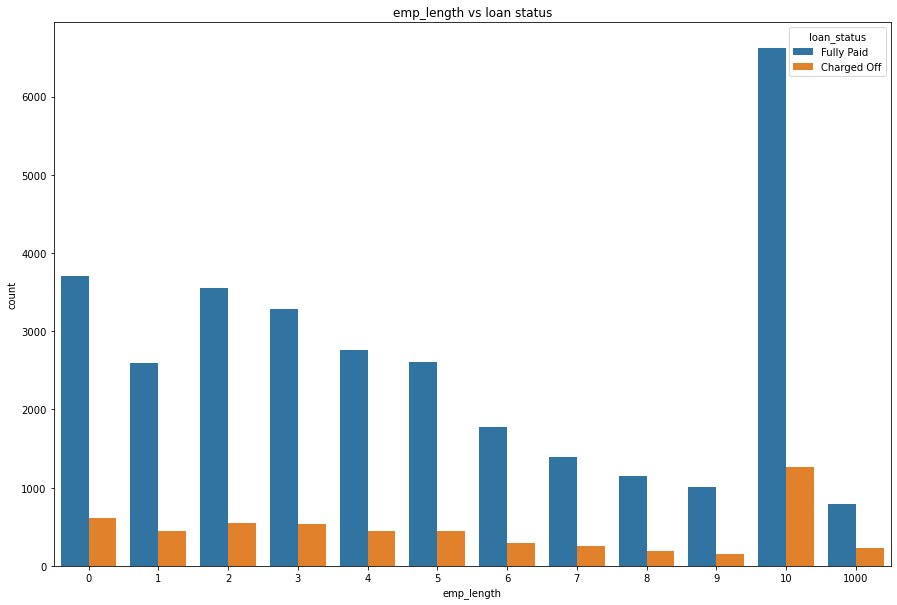

In [68]:
#Analyse the graph to check Loan status vs emp_length
plt.figure(figsize=[15,10])
plt.title("emp_length vs loan status")
sns.countplot(x="emp_length",hue="loan_status",data=ds)
plt.show()

***observation***

Employees more than 10 years experience are having chances of getting defaulted but since there are more loans that is paid as well So we cannot conclude employee service have any significance on loan defaulting.

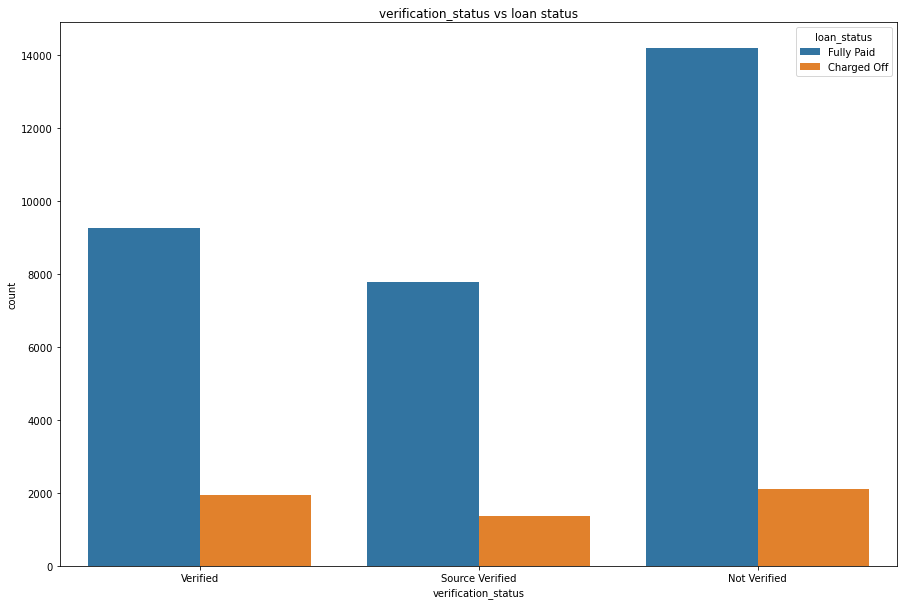

In [69]:
#Analyse the graph to check verification_status vs loan status
plt.figure(figsize=[15,10])
plt.title("verification_status vs loan status")
sns.countplot(x="verification_status",hue="loan_status",data=ds)
plt.show()

In [70]:
#Check to see what columns are most correlatable
loan_corr=ds.corr()
loan_corr.style.background_gradient(cmap='coolwarm', axis=None)

,loan_amnt,funded_amnt,funded_amnt_inv,installment,sub_grade,emp_length,annual_inc,dti
loan_amnt,1.000000,0.981942,0.936925,0.931481,0.031461,-0.053194,0.403197,0.090313
funded_amnt,0.981942,1.000000,0.954850,0.957113,0.024139,-0.053222,0.399030,0.089510
funded_amnt_inv,0.936925,0.954850,1.000000,0.902641,0.025359,-0.043639,0.382429,0.097070
installment,0.931481,0.957113,0.902641,1.000000,0.017986,-0.058377,0.398193,0.079392
sub_grade,0.031461,0.024139,0.025359,0.017986,1.000000,-0.017211,0.009193,0.018002
emp_length,-0.053194,-0.053222,-0.043639,-0.058377,-0.017211,1.000000,-0.107812,-0.011162
annual_inc,0.403197,0.399030,0.382429,0.398193,0.009193,-0.107812,1.000000,-0.072641
dti,0.090313,0.089510,0.097070,0.079392,0.018002,-0.011162,-0.072641,1.000000


**Observations**

Loan_amnt is most correaltable with Installment 

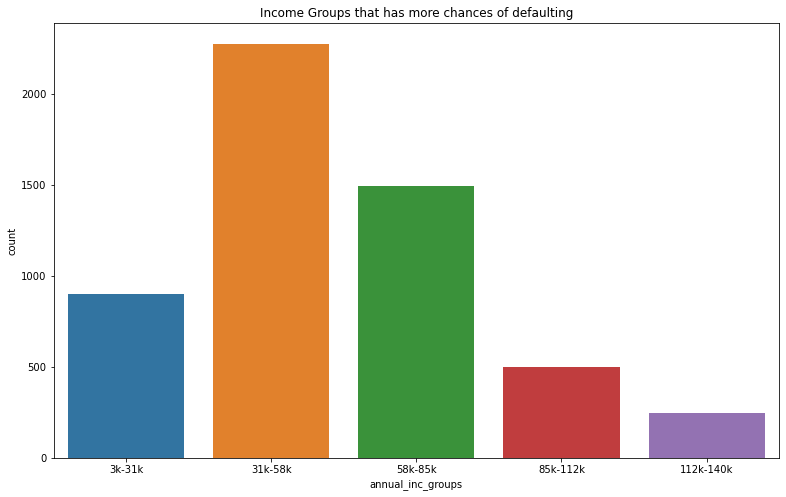

In [71]:
#Now create a new derived column called annual_inc_groups to understand and identify range of incomes at which loan defaulters exist
ds['annual_inc_groups'] = pd.cut(ds['annual_inc'], bins=5,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
fig, ax = plt.subplots(figsize = (13,8))
sns.countplot(x='annual_inc_groups', data=ds[ds.loan_status == 'Charged Off'])
plt.title("Income Groups that has more chances of defaulting")
plt.show()

**Observations**

Income group 31k-58k are more prone to defaulting

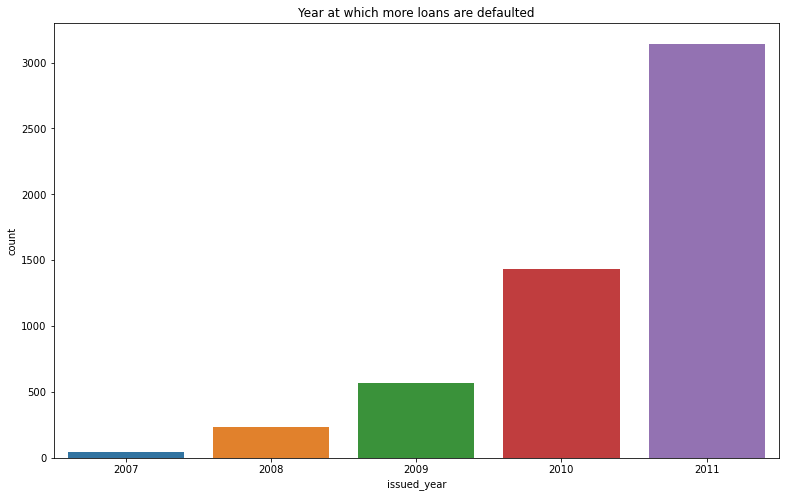

In [72]:
#Lets see for which year the loans given have highest charged off
ds['issued_year']=(pd.to_datetime(ds.issue_d, format='%b-%y')).dt.year
fig, ax = plt.subplots(figsize = (13,8))
sns.countplot(x='issued_year',data=ds[ds.loan_status == 'Charged Off'])
plt.title("Year at which more loans are defaulted")
plt.show()

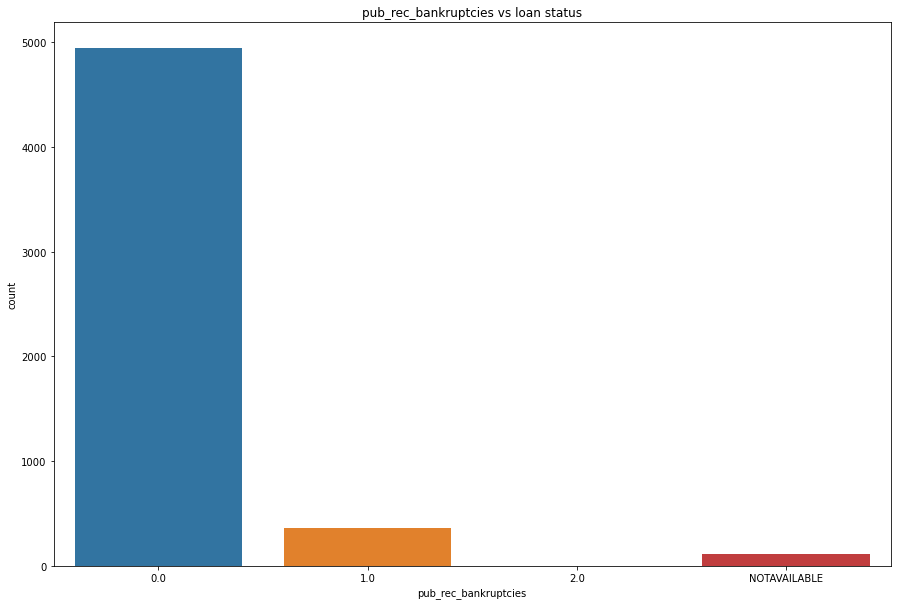

In [73]:
#Lets see for which pub_rec_bankruptcies the loans given have highest charged off
plt.figure(figsize=[15,10])
plt.title("pub_rec_bankruptcies vs loan status")
sns.countplot(x="pub_rec_bankruptcies",data=ds[ds.loan_status == 'Charged Off'])
plt.show()

**Observations**

People with 0 public record Bankruptcy records have more chances of becoming defaulters which means lending company cannot depend on the information of bank rupticies to know if a particular customer can be defaulted or not

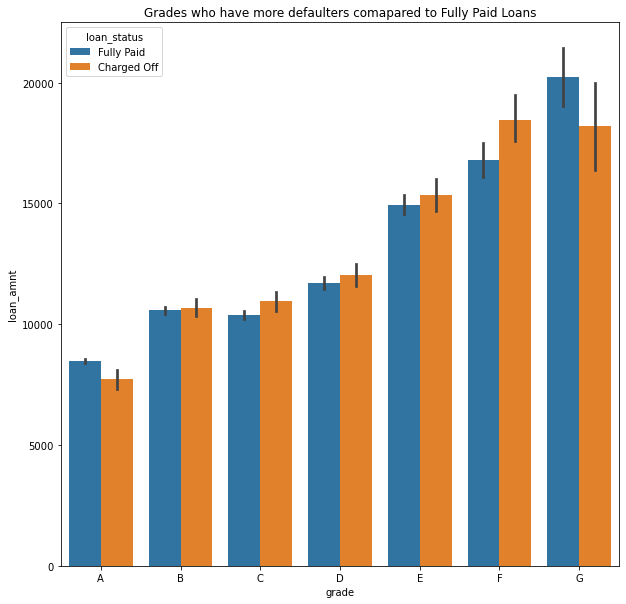

In [74]:
#Compare for which grades there are more loans are requested and there are more defaults
plt.figure(figsize=(10,10))
plt.title("Grades who have more defaulters comapared to Fully Paid Loans")
sns.barplot(data =ds,y='loan_amnt', x='grade', hue ='loan_status', order=['A','B','C','D','E','F','G'])
plt.show()

**Observations**

For grade F there are more defaulters than people who actually paid the loan and for grade G there are more people who paid loan that defaulters

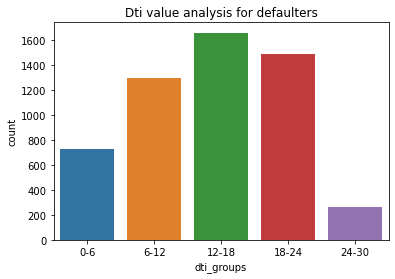

In [76]:
ds['dti_groups'] = pd.cut(ds['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])
plt.title("Dti value analysis for defaulters")
sns.countplot(x='dti_groups', data=ds[ds['loan_status']=='Charged Off'])
plt.show()

**Observations**

People falling under 12-18 % Dti has more chances of defaulting

In [77]:
ds['int_rate'] = ds['int_rate'].apply(lambda x : float(x.rstrip('%')))
ds.groupby(by='loan_status').agg('mean')

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade,emp_length,annual_inc,dti,issued_year
loan_status,,,,,,,,,,
Charged Off,11812.260059,11484.616094,10620.240688,13.757817,327.941161,3.047619,46.374677,56441.758234,14.105788,2010.365264
Fully Paid,10486.245038,10254.282719,9768.243665,11.563767,309.104320,3.052087,30.011077,61621.375137,13.332407,2010.298470


**Observations**
Intreset rate average is 13.7 where as for fully paid loans it will be 11.5. So if intrest rate is greated than 11 % chances of defaulting is more